In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned.csv',index_col=0)
df.head()
df.shape

(3426, 14)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,bmi_bin,glucose_bin
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,2,3,2
2,1,80.0,0,1,1,2,0,105.92,32.5,0,1,2,3,1
3,0,49.0,0,0,1,2,1,171.23,34.4,1,1,1,3,2
4,0,79.0,1,0,1,3,0,174.12,24.0,0,1,2,1,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,2,2,2


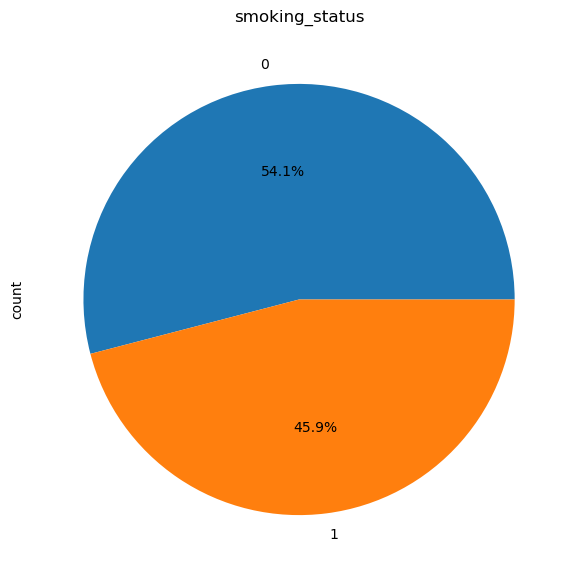

In [4]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking_status')
plt.show()

In [5]:
#train_copy=df
train_copy=df.drop(columns=['bmi','avg_glucose_level','age'])
X = train_copy.drop('smoking_status', axis=1)
y = train_copy['smoking_status']

In [6]:
train_copy.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_bin,bmi_bin,glucose_bin
0,1,0,1,1,2,1,1,1,2,3,2
2,1,0,1,1,2,0,0,1,2,3,1
3,0,0,0,1,2,1,1,1,1,3,2
4,0,1,0,1,3,0,0,1,2,1,2
5,1,0,0,1,2,1,1,1,2,2,2


In [7]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=20)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    max_features = trial.suggest_int('max_features', 1, 10)

    scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=42,
            n_jobs=-1  
        )
        rf.fit(X_train_scaled, y_train)
        y_pred = rf.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_pred)
        scores.append(acc)

    return np.mean(scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  


print(" best_params:", study.best_params)
print(f"best_value: {study.best_value:.4f}")

[I 2025-08-22 16:24:36,929] A new study created in memory with name: no-name-262197ac-c9f9-44f2-8b8f-b10d1791497e
[I 2025-08-22 16:24:37,798] Trial 0 finished with value: 0.5574995211849079 and parameters: {'n_estimators': 260, 'max_depth': 7, 'max_features': 10}. Best is trial 0 with value: 0.5574995211849079.
[I 2025-08-22 16:24:38,326] Trial 1 finished with value: 0.5741448362452385 and parameters: {'n_estimators': 160, 'max_depth': 6, 'max_features': 4}. Best is trial 1 with value: 0.5741448362452385.
[I 2025-08-22 16:24:38,815] Trial 2 finished with value: 0.5496150326658297 and parameters: {'n_estimators': 120, 'max_depth': 10, 'max_features': 10}. Best is trial 1 with value: 0.5741448362452385.
[I 2025-08-22 16:24:39,552] Trial 3 finished with value: 0.5738532910557341 and parameters: {'n_estimators': 220, 'max_depth': 6, 'max_features': 4}. Best is trial 1 with value: 0.5741448362452385.
[I 2025-08-22 16:24:40,152] Trial 4 finished with value: 0.5729752505798983 and parameters:

 best_params: {'n_estimators': 280, 'max_depth': 2, 'max_features': 6}
best_value: 0.5753


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    
    # scaler = MinMaxScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_val_scaled = scaler.transform(X_val)

    
    rf = RandomForestClassifier(
        n_estimators=140,
        max_depth=3,
        max_features=5,
        random_state=42,
        n_jobs=-1  
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)

    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')

    acc_train=rf.predict(X_train)
    acc_train = accuracy_score(y_val, y_pred)


    
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print("-" * 30)

    print(classification_report(y_val, y_pred, digits=2))
    print("-" * 40)


    scores.append(acc)

print(scores)

  Accuracy:  0.5641
  Precision: 0.5579
  Recall:    0.5448
  F1 Score:  0.5267
------------------------------
              precision    recall  f1-score   support

           0       0.57      0.78      0.66       371
           1       0.54      0.31      0.39       315

    accuracy                           0.56       686
   macro avg       0.56      0.54      0.53       686
weighted avg       0.56      0.56      0.54       686

----------------------------------------
  Accuracy:  0.5708
  Precision: 0.5648
  Recall:    0.5565
  F1 Score:  0.5483
------------------------------
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       370
           1       0.55      0.38      0.45       315

    accuracy                           0.57       685
   macro avg       0.56      0.56      0.55       685
weighted avg       0.57      0.57      0.56       685

----------------------------------------
  Accuracy:  0.5971
  Precision: 0.6009
  